In [1]:
#读取数据
import pandas as pd

DATA = pd.read_csv('D:\PHM\Training\Training\M0_G0_LA2_RA0\Sample_1\data_motor.csv')
DATA_CH9 = DATA['CH8']

In [55]:
import numpy as np
Data_sum = np.sqrt((DATA['CH7']**2+DATA['CH8']**2+DATA['CH9']**2)/3)

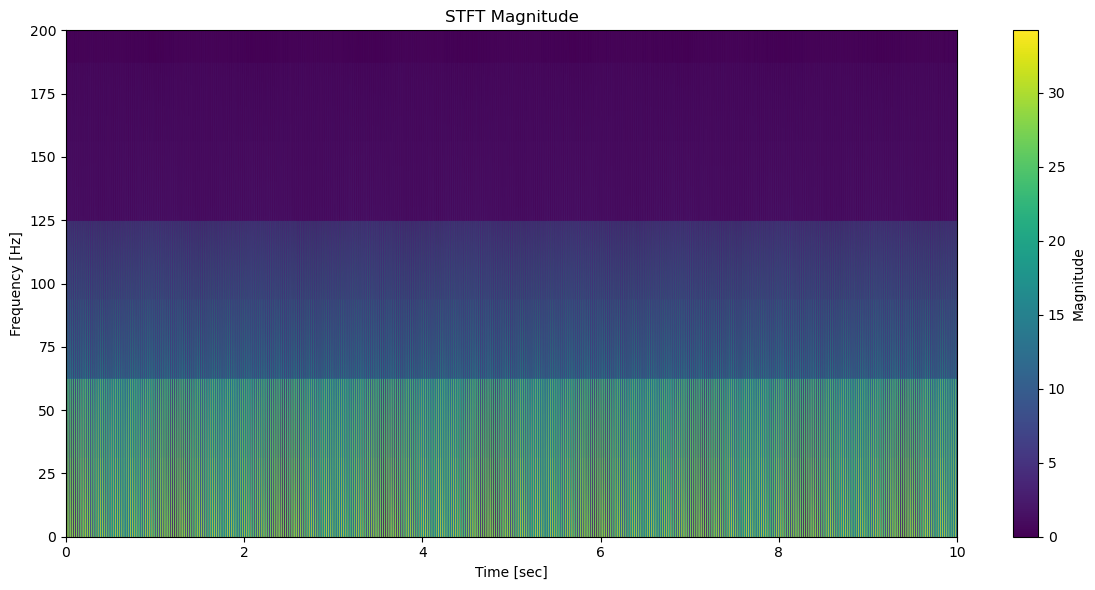

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 假设时域数据存储在数组time_data中
fs = 64000  # 采样频率为64kHz

# 计算STFT
f, t, Zxx = stft(DATA_CH9, fs, nperseg=1024)

# 可视化结果
plt.figure(figsize=(12, 6))

# 时频谱
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
# 设置y轴的上下限为0-1000Hz
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()

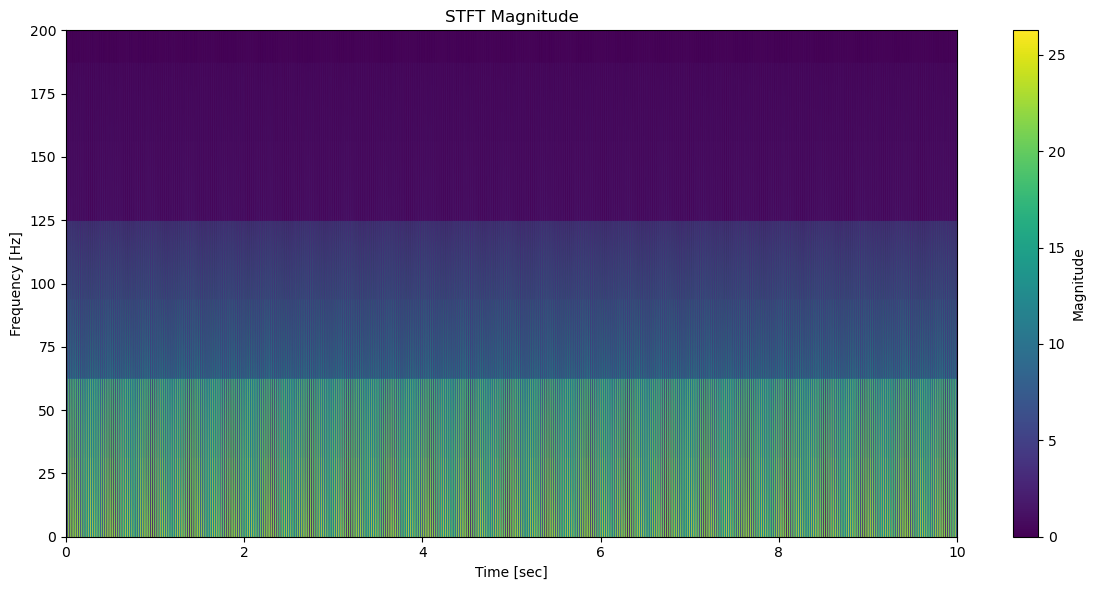

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

# 假设时域数据存储在数组time_data中
fs = 64000  # 采样频率为64kHz

# 计算STFT
f, t, Zxx = stft(DATA_CH9, fs, nperseg=1024)

# 可视化结果
plt.figure(figsize=(12, 6))

# 时频谱
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
# 设置y轴的上下限为0-1000Hz
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()

1250 1250 1250 1250 1250 1250 1250 1250


Text(0, 0.5, 'Crest Factor')

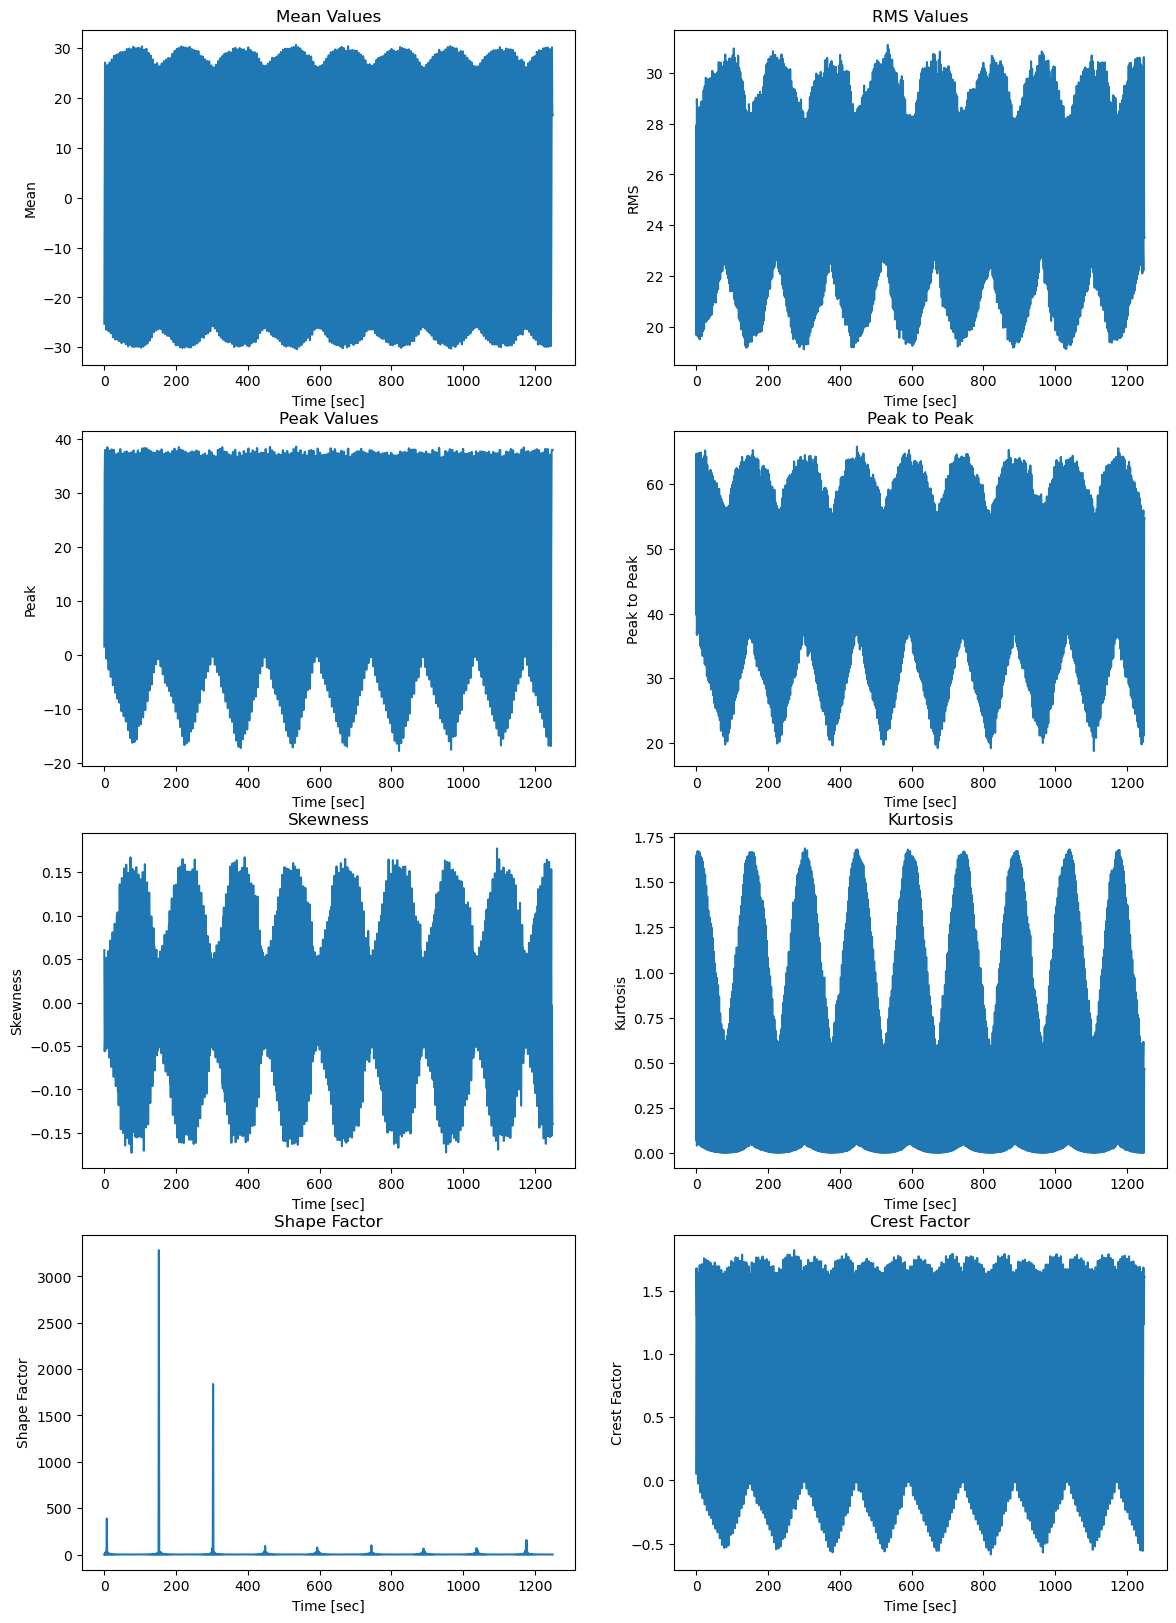

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.stats import entropy

fs = 64000  # 采样频率为64kHz

def time_features(data):
    # window_size = 1024, overlap = 512
    data = np.array(data)
    for i in range(len(data) // 512):
        data_window = data[i * 512: i * 512 + 1024]
        if len(data_window) < 1024:
            data_resize = np.vstack((data_resize, data[-1024:]))
            break
        if i == 0:
            data_resize = data_window[np.newaxis, :]
        else:
            data_resize = np.vstack((data_resize, data_window[np.newaxis, :]))
    # 计算均值
    mean_values = np.mean(data_resize, axis=1)
    # 均方根
    rms_values = np.sqrt(np.mean(data_resize ** 2, axis=1))
    # 峰值
    peak_values = np.max(data_resize, axis=1)
    # 峰峰值
    peak_to_peak = np.max(data_resize, axis=1) - np.min(data_resize, axis=1)
    # 偏度
    skewness = np.mean(((data_resize - mean_values[:, np.newaxis]) ** 3) / rms_values[:, np.newaxis] ** 3, axis=1)
    # 峭度
    kurtosis = np.mean(((data_resize - mean_values[:, np.newaxis]) ** 4) / rms_values[:, np.newaxis] ** 4, axis=1)
    # 波形因子
    shape_factor = rms_values / np.abs(mean_values)
    # 峰值因子
    crest_factor = peak_values / rms_values
    
    return mean_values, rms_values, peak_values, peak_to_peak, skewness, kurtosis, shape_factor, crest_factor


# 计算STFT
# f, t, Zxx = stft(Data_sum, fs, nperseg=1024)

# 计算幅度谱
# magnitude = np.abs(Zxx)

# 1. 频谱质心
def spectral_centroid(magnitude, f):
    return np.sum(f[:, np.newaxis] * magnitude, axis=0) / np.sum(magnitude, axis=0)

# 2. 频谱带宽
def spectral_bandwidth(magnitude, f, centroid):
    return np.sqrt(np.sum(((f[:, np.newaxis] - centroid) ** 2) * magnitude, axis=0) / np.sum(magnitude, axis=0))

# 3. 频谱熵
def spectral_entropy(magnitude):
    magnitude_normalized = magnitude / np.sum(magnitude, axis=0, keepdims=True)
    return entropy(magnitude_normalized, axis=0)

# 4.平均频率
def mean_freq(magnitude, f):
    return np.sum(f[:, np.newaxis] * magnitude, axis=0) / np.sum(magnitude, axis=0)

# 5.均方根频率
def rms_freq(magnitude, f):
    return np.sqrt(np.sum(f[:, np.newaxis] ** 2 * magnitude, axis=0) / np.sum(magnitude, axis=0))

# centroid = spectral_centroid(magnitude, f)
# bandwidth = spectral_bandwidth(magnitude, f, centroid)
# entropy_values = spectral_entropy(magnitude)
# mean_freq = mean_freq(magnitude, f)
# rms_freq = rms_freq(magnitude, f)

# print(len(centroid), len(bandwidth), len(entropy_values))
# # 可视化结果
# plt.figure(figsize=(12, 12))

# plt.subplot(5, 1, 1)
# plt.plot(t, centroid)
# plt.title('Spectral Centroid')
# plt.xlabel('Time [sec]')
# plt.ylabel('Frequency [Hz]')

# plt.subplot(5, 1, 2)
# plt.plot(t, bandwidth)
# plt.title('Spectral Bandwidth')
# plt.xlabel('Time [sec]')
# plt.ylabel('Bandwidth [Hz]')

# plt.subplot(5, 1, 3)
# plt.plot(t, entropy_values)
# plt.title('Spectral Entropy')
# plt.xlabel('Time [sec]')
# plt.ylabel('Entropy')

# plt.subplot(5, 1, 4)
# plt.plot(t, mean_freq)
# plt.title('Mean Frequency')
# plt.xlabel('Time [sec]')
# plt.ylabel('Frequency [Hz]')

# plt.subplot(5, 1, 5)
# plt.plot(t, rms_freq)
# plt.title('RMS Frequency')
# plt.xlabel('Time [sec]')
# plt.ylabel('Frequency [Hz]')

# plt.tight_layout()
# plt.show()

time_features = time_features(DATA_CH9)
print(len(time_features[0]), len(time_features[1]), len(time_features[2]), len(time_features[3]), len(time_features[4]), len(time_features[5]), len(time_features[6]), len(time_features[7]))

# 可视化结果
plt.figure(figsize=(14, 20))

plt.subplot(4, 2, 1)

plt.plot(time_features[0])
plt.title('Mean Values')
plt.xlabel('Time [sec]')
plt.ylabel('Mean')

plt.subplot(4, 2, 2)
plt.plot(time_features[1])
plt.title('RMS Values')
plt.xlabel('Time [sec]')
plt.ylabel('RMS')

plt.subplot(4, 2, 3)
plt.plot(time_features[2])
plt.title('Peak Values')
plt.xlabel('Time [sec]')
plt.ylabel('Peak')

plt.subplot(4, 2, 4)
plt.plot(time_features[3])
plt.title('Peak to Peak')
plt.xlabel('Time [sec]')
plt.ylabel('Peak to Peak')

plt.subplot(4, 2, 5)
plt.plot(time_features[4])
plt.title('Skewness')
plt.xlabel('Time [sec]')
plt.ylabel('Skewness')

plt.subplot(4, 2, 6)
plt.plot(time_features[5])
plt.title('Kurtosis')
plt.xlabel('Time [sec]')
plt.ylabel('Kurtosis')

plt.subplot(4, 2, 7)
plt.plot(time_features[6])
plt.title('Shape Factor')
plt.xlabel('Time [sec]')
plt.ylabel('Shape Factor')

plt.subplot(4, 2, 8)
plt.plot(time_features[7])
plt.title('Crest Factor')
plt.xlabel('Time [sec]')
plt.ylabel('Crest Factor')


In [15]:
import numpy as np
import pandas as pd
from scipy.signal import stft
from scipy.stats import entropy

# 计算频谱特征
# 1. 频谱质心
def spectral_centroid(magnitude, f):
    return np.sum(f[:, np.newaxis] * magnitude, axis=0) / np.sum(magnitude, axis=0)

# 2. 频谱带宽
def spectral_bandwidth(magnitude, f, centroid):
    return np.sqrt(np.sum(((f[:, np.newaxis] - centroid) ** 2) * magnitude, axis=0) / np.sum(magnitude, axis=0))

# 3. 频谱熵
def spectral_entropy(magnitude):
    magnitude_normalized = magnitude / np.sum(magnitude, axis=0, keepdims=True)
    return entropy(magnitude_normalized, axis=0)

# 4.平均频率
def mean_freq_(magnitude, f):
    return np.sum(f[:, np.newaxis] * magnitude, axis=0) / np.sum(magnitude, axis=0)

# 5.均方根频率
def rms_freq_(magnitude, f):
    return np.sqrt(np.sum(f[:, np.newaxis] ** 2 * magnitude, axis=0) / np.sum(magnitude, axis=0))

def feature_extraction(data):
    fs = 64000  # 采样频率为64kHz
    f, t, Zxx = stft(data, fs, nperseg=1024)
    magnitude = np.abs(Zxx)

    centroid = spectral_centroid(magnitude, f)
    bandwidth = spectral_bandwidth(magnitude, f, centroid)
    entropy_values = spectral_entropy(magnitude)
    mean_freq = mean_freq_(magnitude, f)
    rms_freq = rms_freq_(magnitude, f)

    return centroid, bandwidth, entropy_values, mean_freq, rms_freq

def time_features_extraction(data):
    # window_size = 1024, overlap = 512
    data = np.array(data)
    for i in range(len(data) // 512):
        data_window = data[i * 512: i * 512 + 1024]
        if len(data_window) < 1024:
            data_resize = np.vstack((data_resize, data[-1024:]))
            break
        if i == 0:
            data_resize = data_window[np.newaxis, :]
        else:
            data_resize = np.vstack((data_resize, data_window[np.newaxis, :]))
    # 计算均值
    mean_values = np.mean(data_resize, axis=1)
    # 均方根
    rms_values = np.sqrt(np.mean(data_resize ** 2, axis=1))
    # 峰值
    peak_values = np.max(data_resize, axis=1)
    # 峰峰值
    peak_to_peak = np.max(data_resize, axis=1) - np.min(data_resize, axis=1)
    # 偏度
    skewness = np.mean(((data_resize - mean_values[:, np.newaxis]) ** 3) / rms_values[:, np.newaxis] ** 3, axis=1)
    # 峭度
    kurtosis = np.mean(((data_resize - mean_values[:, np.newaxis]) ** 4) / rms_values[:, np.newaxis] ** 4, axis=1)
    # 波形因子
    shape_factor = rms_values / np.abs(mean_values)
    # 峰值因子
    crest_factor = peak_values / rms_values
    
    return mean_values, rms_values, peak_values, peak_to_peak, skewness, kurtosis, shape_factor, crest_factor


#获取一个文件内的所有文件名字
import os
path = 'D:\PHM\Training\Training'
output_path = 'D:\PHM\Data_range'
files = os.listdir(path)

for file in files:
    files2 = os.listdir(f'{path}/{file}')
    for file2 in files2:
        files3 = os.listdir(f'{path}/{file}/{file2}')
        for file3 in files3:
            data = pd.read_csv(f'{path}/{file}/{file2}/{file3}')
            #获取data的所有列
            data_columns = data.columns
            for column in data_columns:
                features = pd.DataFrame(columns=['centroid', 'bandwidth', 'entropy', 'mean_freq', 'rms_freq', 'mean', 'rms', 
                                                 'peak', 'peak_to_peak', 'skewness', 'kurtosis', 'shape_factor', 'crest_factor'])
                #去除file3的后缀.csv
                file3 = file3.split('.')[0]
                name = file3 +'_'+column
                data_CHn = data[column]
                centroid, bandwidth, entropy_values, mean_freq, rms_freq = feature_extraction(data_CHn)
                time_features = time_features_extraction(data_CHn)
                length = len(time_features[0])
                features['centroid'] = centroid[:length]
                features['bandwidth'] = bandwidth[:length]
                features['entropy'] = entropy_values[:length]
                features['mean_freq'] = mean_freq[:length]
                features['rms_freq'] = rms_freq[:length]
                features['mean'] = time_features[0]
                features['rms'] = time_features[1]
                features['peak'] = time_features[2]
                features['peak_to_peak'] = time_features[3]
                features['skewness'] = time_features[4]
                features['kurtosis'] = time_features[5]
                features['shape_factor'] = time_features[6]
                features['crest_factor'] = time_features[7]
                # 创建路径
                if not os.path.exists(f'{output_path}/{file}/{file2}'):
                    os.makedirs(f'{output_path}/{file}/{file2}')
                features.to_csv(f'{output_path}/{file}/{file2}/{name}_features.csv', index=False)

In [ ]:
data_M = pd.read_csv('D:\PHM\Data_range\M0_G0_LA2_RA0\Sample_1\data_motor.csv')

CNN模型

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class ConvNet(nn.Module):
    def __init__(self, kernel, n_output):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=13, out_channels=32, kernel_size=kernel[0], stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=kernel[1], stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=kernel[2], stride=1, padding=1)
        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(64, n_output)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.conv2(x)
        x = torch.relu(x)
        x = self.conv3(x)
        x = torch.relu(x)
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc(x)
        return x # tensor(32, n)
    
class Super_conv(nn.Module):
    def __init__(self, kernel_list, n_output):
        super(Super_conv, self).__init__()
        self.conv_nets = nn.ModuleList([ConvNet(kernel, n_output) for kernel in kernel_list])

    def forward(self, x, input_dims):
        outputs = []
        # x的shape为(32, 21, 13)，转置为(32, 13, 21)
        x = x.permute(0, 2, 1)
        # 转为(32,1,13,21)
        x = x.unsqueeze(1)
        for i, input_dim in enumerate(input_dims):
            outputs.append(self.conv_nets[i](x[: , : , :,  i*input_dim:(i+1)*input_dim])) 
        return outputs # 4*tensor(32, n)
    
class classifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(classifier, self).__init__()
        self.fc2 = nn.Linear(input_dim, output_dim) # input_dim = 32, output_dim = 4, 8, 3, 2, 1
        
    def forward(self,x):# x = tensor(32, n)
        x = self.fc2(x) # tensor(32, output_dim)
        return x
    
class Super_classifier(nn.Module):
    def __init__(self, input_dim, output_dims):
        super(Super_classifier, self).__init__()
        self.classifiers = nn.ModuleList([classifier(input_dim, output_dim) for output_dim in output_dims])
        
    def forward(self,x_list): # x_list = 4*tensor(32, n)
        for i, x in enumerate(x_list):
            x_list[i] = self.classifiers[i](x) # x = tensor(32, n), x_list[i] = tensor(32, output_dim)
        return x_list
    
# 定义损失函数
class loss_fn(nn.Module):
    def __init__(self):
        super(loss_fn, self).__init__()
        self.loss = nn.CrossEntropyLoss()
        
    def forward(self, outputs, targets):
        return self.loss(outputs, targets)
    
class Super_conv_classifier(nn.Module):
    def __init__(self, input_dims,output_dims,kernel_list,n_output):
        super(Super_conv_classifier, self).__init__()
        self.input_dims = input_dims
        self.output_dims = output_dims
        self.n_output = n_output
        self.super_conv = Super_conv(kernel_list,n_output)
        self.super_classifier = Super_classifier(n_output, output_dims)
        
    def forward(self,x):
        conv_outputs = self.super_conv(x, self.input_dims)
        mask_matrix = [[1,1,0,0],[1,1,1,1],[0,1,1,0],[0,1,0,1]]
        mask_matrix = torch.tensor(mask_matrix,dtype = torch.float32).to(x.device)
        conv_all = torch.stack(conv_outputs, dim=1) # tensor(32, 4, n)
        for i in range(conv_all.size(0)):
            conv_all[i] = torch.matmul(mask_matrix, conv_all[i]) # tensor(4, n)
        for i in range(len(conv_outputs)):
            conv_outputs[i] = conv_all[:,i,:] # 4*tensor(32, n)
        del conv_all
        classifier_outputs = self.super_classifier(conv_outputs) # 4*tensor(32, output_dim)
        classifier_outputs = torch.cat(classifier_outputs, dim=1) # tensor(32, sum(output_dims))
        return classifier_outputs
    
def train(model, dataloader, optimizer, loss_fn, device):
    model.train()
    total_loss = 0
    for data, target in dataloader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def test(model, dataloader, loss_fn, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = loss_fn(output, target)
            total_loss += loss.item()
    return total_loss / len(dataloader)

def calculate_accuracy(y_true, y_pred):
    """
    计算准确率 (Accuracy)
    """
    return accuracy_score(y_true, y_pred)

def calculate_precision(y_true, y_pred, average='macro'):
    """
    计算精确率 (Precision)
    - average 参数控制如何计算多标签分类的精确率，默认 'macro' 计算每个标签的精确率，然后取平均值
    """
    return precision_score(y_true, y_pred, average=average)

def calculate_recall(y_true, y_pred, average='macro'):
    """
    计算召回率 (Recall)
    - average 参数控制如何计算多标签分类的召回率，默认 'macro' 计算每个标签的召回率，然后取平均值
    """
    return recall_score(y_true, y_pred, average=average)

def calculate_f1(y_true, y_pred, average='macro'):
    """
    计算 F1 分数
    - average 参数控制如何计算多标签分类的 F1 分数，默认 'macro' 计算每个标签的 F1 分数，然后取平均值
    """
    return f1_score(y_true, y_pred, average=average)

def evaluate(model, dataloader, device):
    model.eval()
    y_true_all = []
    y_pred_all = []

    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            # 将 output 大于 0.5 的值设为 1，小于 0.5 的值设为 0
            pred = (output > 0.5).float()
            
            y_true_all.append(target.cpu().numpy())
            y_pred_all.append(pred.cpu().numpy())

    # 将所有批次的结果拼接
    y_true_all = np.vstack(y_true_all)
    y_pred_all = np.vstack(y_pred_all)

    # 计算并打印各项指标
    accuracy = calculate_accuracy(y_true_all, y_pred_all)
    precision = calculate_precision(y_true_all, y_pred_all)
    recall = calculate_recall(y_true_all, y_pred_all)
    f1 = calculate_f1(y_true_all, y_pred_all)
    return 0.4*accuracy + 0.2*precision + 0.2*recall + 0.2*f1

lossfn = loss_fn()

In [73]:
conv_outputs0 = torch.randn(32,27)
conv_outputs1 = torch.randn(32,27)
conv_outputs2 = torch.randn(32,27)
conv_outputs3 = torch.randn(32,27)
conv_list = [conv_outputs0,conv_outputs1,conv_outputs2,conv_outputs3]
mask_matrix = [[1,1,0,0],[1,1,1,1],[0,1,1,0],[0,1,0,1]]
# conv_list调整为（32,4,27）
conv_list = torch.stack(conv_list, dim=1)
#对每个4*27的矩阵进行mask操作
for i in range(conv_list.size(0)):
    conv_list[i] = torch.matmul(torch.tensor(mask_matrix,dtype=torch.float32), conv_list[i])
print(conv_list.size())


torch.Size([32, 4, 27])


In [6]:
# 读取.npy数据
import numpy as np
import pandas as pd

data_train_x = np.load('D:/PHM/train_X_13.npy')
data_train_y = np.load('D:/PHM/train_Y_13.npy')

In [7]:
# 转换为Tensor
train_x = torch.tensor(data_train_x, dtype=torch.float32)
train_y = torch.tensor(data_train_y, dtype=torch.float32)

# 划分训练集，测试集，验证集，70%训练集，20%测试集，10%验证集
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.3, random_state=42)
test_x, val_x, test_y, val_y = train_test_split(test_x, test_y, test_size=0.33, random_state=42)

In [8]:
train_y

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [19]:
# 假设目标输出维度 n = 10
n_output = 128
kernel1 = 3
kernel2 = 3
kernel3 = 3
kernel4 = 3
kernel_list = [[kernel1, kernel1, kernel1], 
               [kernel2, kernel2, kernel2], 
               [kernel3, kernel3, kernel3], 
               [kernel4, kernel4, kernel4]]
input_dims = [9, 6, 3, 3]
output_dims = [4, 8, 4, 1]
model = Super_conv_classifier(input_dims, output_dims, kernel_list, n_output)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
# lossfn = loss_fn()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

train_data = train_x.to(device)
test_data = test_x.to(device)
val_data = val_x.to(device)
train_target = train_y.to(device)
test_target = test_y.to(device)
val_target = val_y.to(device)
# 构建dataloader
traindataset = TensorDataset(train_data, train_target)
testdataset = TensorDataset(test_data, test_target)
valdataset = TensorDataset(val_data, val_target)
trainDataLoader = DataLoader(traindataset, batch_size=32, shuffle=True)
testDataLoader = DataLoader(testdataset, batch_size=32, shuffle=False)
valDataLoader = DataLoader(valdataset, batch_size=32, shuffle=False)

# 训练模型
n_epochs = 100
temproal_loss = 999999
data_acc = pd.DataFrame(columns=['epoch', 'train_loss', 'val_loss', 'test_loss', 'test_acc'])
for epoch in range(n_epochs+1):
    train_loss = train(model, trainDataLoader, optimizer, lossfn, device)
    val_loss = test(model, valDataLoader, lossfn, device)
    if val_loss < temproal_loss:
        torch.save(model.state_dict(), f'./model/{n_output}_{kernel1}_{kernel2}_{kernel3}_{kernel4}_model_features_13.pth')
        temproal_loss = val_loss
    if epoch % 10 == 0:
        test_loss = test(model, testDataLoader, lossfn, device)
        test_eval = evaluate(model, testDataLoader, device)
        # 添加epoch, train_loss, val_loss, test_loss, test_acc到data_acc
        data_acc.loc[len(data_acc)] = [epoch, train_loss, val_loss, test_loss, test_eval]
        print(f'Epoch {epoch + 1}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Test Loss: {test_loss:.4f}, Test eval: {test_eval:.4f}')
    print(f'Epoch {epoch + 1}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
data_acc.to_csv(f'./result/{n_output}_{kernel1}_{kernel2}_{kernel3}_{kernel4}_acc_features_13.csv', index=False)

Epoch 1, Loss: 8.6900, Val Loss: 4.5087, Test Loss: 6.6070, Test eval: 0.2596
Epoch 1, Loss: 8.6900, Val Loss: 4.5087
Epoch 2, Loss: 19.3236, Val Loss: 1.9329
Epoch 3, Loss: 17.0051, Val Loss: 1.7205
Epoch 4, Loss: 25.6052, Val Loss: 1.0339
Epoch 5, Loss: 8.7045, Val Loss: 1.1723
Epoch 6, Loss: 9.9559, Val Loss: 0.8076
Epoch 7, Loss: 6.2021, Val Loss: 0.8193
Epoch 8, Loss: 3.4879, Val Loss: 0.8032
Epoch 9, Loss: 1.0717, Val Loss: 0.7633
Epoch 10, Loss: 1.7841, Val Loss: 0.7627
Epoch 11, Loss: 0.8128, Val Loss: 0.8127, Test Loss: 0.8141, Test eval: 0.3746
Epoch 11, Loss: 0.8128, Val Loss: 0.8127
Epoch 12, Loss: 0.7730, Val Loss: 0.7622
Epoch 13, Loss: 0.7444, Val Loss: 0.7833
Epoch 14, Loss: 0.7536, Val Loss: 0.7258
Epoch 15, Loss: 0.9219, Val Loss: 0.7513
Epoch 16, Loss: 0.7619, Val Loss: 0.7105
Epoch 17, Loss: 0.7208, Val Loss: 0.7142
Epoch 18, Loss: 0.7165, Val Loss: 0.7510
Epoch 19, Loss: 0.7202, Val Loss: 0.7194
Epoch 20, Loss: 0.7161, Val Loss: 0.6884
Epoch 21, Loss: 1.0490, Val L

测试集

In [65]:
import numpy as np
import pandas as pd
from scipy.signal import stft
from scipy.stats import entropy

# 计算频谱特征
# 1. 频谱质心
def spectral_centroid(magnitude, f):
    return np.sum(f[:, np.newaxis] * magnitude, axis=0) / np.sum(magnitude, axis=0)

# 2. 频谱带宽
def spectral_bandwidth(magnitude, f, centroid):
    return np.sqrt(np.sum(((f[:, np.newaxis] - centroid) ** 2) * magnitude, axis=0) / np.sum(magnitude, axis=0))

# 3. 频谱熵
def spectral_entropy(magnitude):
    magnitude_normalized = magnitude / np.sum(magnitude, axis=0, keepdims=True)
    return entropy(magnitude_normalized, axis=0)

# 4.平均频率
def mean_freq_(magnitude, f):
    return np.sum(f[:, np.newaxis] * magnitude, axis=0) / np.sum(magnitude, axis=0)

# 5.均方根频率
def rms_freq_(magnitude, f):
    return np.sqrt(np.sum(f[:, np.newaxis] ** 2 * magnitude, axis=0) / np.sum(magnitude, axis=0))

def feature_extraction(data):
    fs = 64000  # 采样频率为64kHz
    f, t, Zxx = stft(data, fs, nperseg=1024)
    magnitude = np.abs(Zxx)

    centroid = spectral_centroid(magnitude, f)
    bandwidth = spectral_bandwidth(magnitude, f, centroid)
    entropy_values = spectral_entropy(magnitude)
    mean_freq = mean_freq_(magnitude, f)
    rms_freq = rms_freq_(magnitude, f)

    return centroid, bandwidth, entropy_values, mean_freq, rms_freq


#获取一个文件内的所有文件名字
import os
path = 'D:\PHM\Test_2\Test'
output_path = 'D:\PHM\Data_test_2'
files = os.listdir(path)

for file in files:
    files2 = os.listdir(f'{path}/{file}')
    for file2 in files2:
        data = pd.read_csv(f'{path}/{file}/{file2}')
        #获取data的所有列
        data_columns = data.columns
        for column in data_columns:
            features = pd.DataFrame(columns=['centroid', 'bandwidth', 'entropy', 'mean_freq', 'rms_freq'])
            #去除file3的后缀.csv
            file2 = file2.split('.')[0]
            name = file2 +'_'+column
            data_CHn = data[column]
            centroid, bandwidth, entropy_values, mean_freq, rms_freq = feature_extraction(data_CHn)
            features['centroid'] = centroid
            features['bandwidth'] = bandwidth
            features['entropy'] = entropy_values
            features['mean_freq'] = mean_freq
            features['rms_freq'] = rms_freq
            # 创建路径
            if not os.path.exists(f'{output_path}/{file}'):
                os.makedirs(f'{output_path}/{file}')
            features.to_csv(f'{output_path}/{file}/{name}_features.csv', index=False)

In [1]:
import numpy as np
import pandas as pd
import os
import re

#创建同一标签下的样本整合函数
def generate_data(read_path):
    """
    read_path为数据文件夹路径, 其中包含三个sample文件夹
    每个sample文件夹下有21个csv文件，分别代表21个通道
    每个csv文件中有多个样本，每个样本有5个特征
    输出为样本数*21（通道数）*5（特征数）的三维数组
    """
    #分别读取read_path下的三个sample文件夹
    sample_path = os.listdir(read_path)
    #创建一个空的numpy数组，用于存储一个read_path文件夹下的所有sample文件的数据
    data_all = np.array([])
    for sample in sample_path:
        sample_path = os.path.join(read_path, sample)
        #创建一个空的numpy数组，用于存储一个sample文件夹下的所有通道文件
        data_channels = np.array([])
        #读取sample文件夹下的21个通道文件
        channel_path = os.listdir(sample_path)
        #将channel_path中的通道文件名按“_”分割，并根据倒数第二个字符串进行排序
        channel_path = sorted(channel_path, key=lambda x: int(re.sub("\D", "", x.split("_")[-2])))
    
        #遍历所有通道文件
        for channel in channel_path:
            channel_path = os.path.join(sample_path, channel)
            #用numpy读取通道文件中的多个样本
            data = pd.read_csv(channel_path)
            #将data转换为numpy数组
            data = data.values #data.shape = (样本数，特征数)
            #将data添加到data_all中，且维度变为（样本数，特征数，通道数）
            if data_channels.size == 0:
                data_channels = data
            else:
                data_channels = np.dstack((data_channels, data))
        #遍历所有channel之后，data_channels的维度为（样本数，5，21）

        #将data_channels添加到data_all中，按样本数堆叠，维度变为（+样本数，5，21）
        if data_all.size == 0:
            data_all = data_channels
        else:
            data_all = np.vstack((data_all, data_channels))
    
    #遍历所有sample之后，data_all的维度为（样本数，5，21）
    #将后两个维度转置，变为（样本数，21，5）
    data_all = np.transpose(data_all, (0,2,1))

    #生成X和Y
    return data_all

In [67]:
path = "D:\PHM\Data_test_2"
data_test = generate_data(path)
data_test.shape

(32508, 21, 5)

In [68]:
save_path = "D:\PHM"
np.save(f'{save_path}/test_2_X.npy', data_test)

In [69]:
# 加载模型参数64_3_3_3_3_model.pth

model = Super_conv_classifier(input_dims, output_dims, kernel_list, n_output)
model.load_state_dict(torch.load('./model/64_3_3_3_3_model.pth'))

<All keys matched successfully>

In [70]:
#定义predict函数
def predict_CNN(model, data):
    #将data转换为tensor
    data = torch.tensor(data, dtype=torch.float32)
    #将data输入模型
    output = model(data)
    #将output转换为numpy
    output = output.cpu().detach().numpy()
    return output

#每一个sample具备126条数据，以126条数据的结果进行投票，出现次数最多的output作为最终结果
def cut_test_vote(model, data_all):
    #创建一个空的numpy数组，用于存储所有sample的预测结果
    output_all = np.array([])
    #,步长126，遍历所有sample
    for i in range(0, data_all.shape[0], 126):
        #创建一个空的numpy数组，用于存储一个sample的预测结果
        output_sample = np.array([])
        data_sample = data_all[i:i+126, :, :]
        #将一个sample的数据输入模型进行预测
        output = predict_CNN(model, data_sample)
        #将output添加到output_sample中
        if output_sample.size == 0:
            output_sample = output
        else:
            output_sample = np.vstack((output_sample, output))
        #遍历一个sample的所有数据之后，output_sample的维度为（126，output_dim）
        # 将output_sample大于0.5的值设为1，小于0.5的值设为0
        output_sample = (output_sample > 0.5).astype(int)
        # 寻找output_sample中出现次数最多的output
        output_vote = np.zeros(output_sample.shape[1])
        for i in range(output_sample.shape[1]):
            output_vote[i] = np.argmax(np.bincount(output_sample[:, i]))
        #将output_vote添加到output_all中
        if output_all.size == 0:
            output_all = output_vote
        else:
            output_all = np.vstack((output_all, output_vote))
    return output_all

In [56]:
# 生成（252,21,5）的随机数据测试算法效果
data_test = np.random.randn(252,21,5)
output_all = cut_test_vote(model, data_test)
print(output_all)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [71]:
# 读取.npy数据
import numpy as np
import pandas as pd

data_test_x = np.load('D:/PHM/test_2_X.npy')
# 运行测试函数
output_all = cut_test_vote(model, data_test_x)
print(output_all.shape)

(258, 21)


In [73]:
output_all = pd.DataFrame(output_all)
output_all.to_csv('D:/PHM/result/test_2_vector.csv', index=False)